### **Prediction**

In [613]:
import pandas as pd

df = pd.read_csv('assets/student_score.csv')

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [615]:
df.dropna(inplace=True)

In [616]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [617]:
df.head()

,Hours,Scores
0,-1.111548,-1.326840
1,-0.067354,-0.282111
2,-0.830419,-1.085749
3,1.298131,0.842983
4,-0.709935,-0.965203


In [618]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], train_size=0.8, random_state=10)

In [619]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [620]:
def get_prediction(hours):
    std_hours = (hours - scaler.mean_[0]) / scaler.scale_[0]
    hours_df = pd.DataFrame([[std_hours]], columns=['Hours'])
    prediction = model.predict(hours_df)
    value = prediction[0, 0]
    return value * scaler.scale_[1] + scaler.mean_[1]

In [621]:
get_prediction(5.5)

np.float64(56.6536645793349)

In [622]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(x_test))

0.9836248864713

### **Visualization**

In [623]:
import matplotlib.pyplot as plt

/home/hans/.pyenv/versions/3.10.10/envs/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/hans/.pyenv/versions/3.10.10/envs/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Scores')

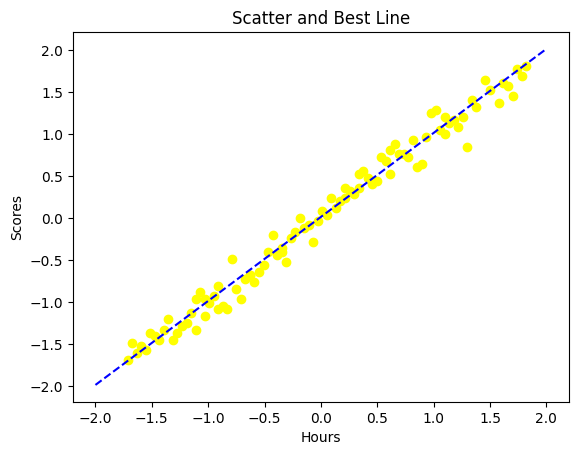

In [624]:
plt.scatter(df['Hours'], df['Scores'], color='yellow')
X = [-2, 2]
Y = [model.predict([[-2]])[0, 0], model.predict([[2]])[0, 0]]
plt.plot(X, Y, color='blue', linestyle='dashed')
plt.title('Scatter and Best Line')
plt.xlabel('Hours')
plt.ylabel('Scores')

### **Evaluation**

In [625]:
from sklearn.metrics import r2_score, mean_squared_error

predictions = model.predict(x_test).transpose()[0]

In [626]:
r2_score(y_test, predictions)

0.9836248864713

In [627]:
mean_squared_error(y_test, predictions)

0.0234556521621734